In [24]:
import pickle

In [27]:
res_dir = '/Users/daffa/Documents/Work/jspp67_bioinf/TAA_cluster-1st_attempt/20260202_111314'

In [28]:
def load_pklobj(pklobj):
    with open(pklobj, 'rb') as f:
        pyobj = pickle.load(f)
    
    return pyobj

In [29]:
edges = load_pklobj(f'{res_dir}/sbi_edges.pkl')
G = load_pklobj(f'{res_dir}/sbi_G_prpF.pkl')

In [30]:
edges

[('8070268', '8062938', 6.5333),
 ('8070268', '8059937', 5.8035),
 ('8070268', '110432537', 5.5927),
 ('8070268', '8068284', 5.5603),
 ('8070268', '110434073', 5.3819),
 ('8070268', '110430166', 4.9927),
 ('8070268', '8060003', 4.9764),
 ('8070268', '8083713', 4.9764),
 ('8070268', '8063885', 4.9764),
 ('8070268', '8066970', 4.8629),
 ('8069345', '8057460', 6.7117),
 ('8069345', '110434961', 5.7062),
 ('8069345', '8071851', 5.1548),
 ('8069345', '8073063', 5.0413),
 ('8069345', '110431699', 5.0413),
 ('8069345', '110429775', 4.8305),
 ('8069345', '8063624', 4.798),
 ('8069345', '8065994', 4.7818),
 ('8069345', '8060610', 4.7494),
 ('8069345', '8055046', 4.6359),
 ('8056598', '8074101', 5.9657),
 ('8056598', '8076738', 5.9009),
 ('8056598', '110433086', 5.3494),
 ('8056598', '8081150', 5.1224),
 ('8056598', '8055718', 4.8467),
 ('8056598', '8069132', 4.6196),
 ('8078839', '8062136', 5.0413),
 ('8078839', '8058467', 4.6845),
 ('8078839', '8058441', 4.5386),
 ('8078839', '8057950', 4.2142

In [31]:
# check number of edges in the networkx Graph G
print("G.number_of_edges():", G.number_of_edges())
print("len(edges):", len(edges))
# the Graph has fewer edges, because of the anti-duplicate measure

G.number_of_edges(): 114053
len(edges): 152970


# visualizing graph
star of aconitate isomerase top 2 hits

In [49]:
def single_col_tsv(file_path, n=2):
    with open(file_path, 'r') as f:
        return [f.readline().strip() for _ in range(n)]
        
top_hit = single_col_tsv('/Users/daffa/Documents/Work/jspp67_bioinf/hit_genes_for_clustering/hits_EGI_uniq.txt')

In [50]:
top_hit

['8062755', '8080652']

In [38]:
HITS_FILE_PATH = '/Users/daffa/Documents/Work/jspp67_bioinf/hit_genes_for_clustering/hits_EGI_uniq.txt'

# or, load hit as a vector (python list)
def single_col_tsv(file_path):
    with open(file_path, 'r') as f:
        rows = f.readlines()
        final = []
        for row in rows:
            row = row.replace('\n', '')
            final.append(row)
    
    return final

hits_vector = single_col_tsv(HITS_FILE_PATH)
hits_vector

['8062755',
 '8080652',
 '8073872',
 '8060856',
 '8072274',
 '8058078',
 '8077365',
 '8068646',
 '8077416',
 '8076503',
 '8076021',
 '8059145',
 '8057696',
 '8069001',
 '8073573']

In [16]:
G['8062755']

AtlasView({'8069637': {'weight': 4.6845}, '110433192': {'weight': 4.2466}, '8073924': {'weight': 4.1818}})

In [17]:
G['8080652']

AtlasView({'8065172': {'weight': 4.4899}, '8070181': {'weight': 4.3602}, '8075464': {'weight': 4.2304}, '8085637': {'weight': 5.0251}, '8081457': {'weight': 4.8143}, '8054667': {'weight': 4.6034}, '8076406': {'weight': 4.0845}, '8067052': {'weight': 4.052}})

## cytoscape stuffs

In [52]:
import py4cytoscape as p4c
import pandas as pd
import networkx as nx

In [53]:
def build_single_gene_graph(edges, gene):
    '''
    initiate an empty undirected graph, then load the edges list
    use the correct method (add_weighted_edges_from)
    '''
    G = nx.Graph()
    # G.add_weighted_edges_from(edges)
    for u, v, z, in edges:
        if u == gene:
            G.add_edge(u, v, weight=z)
        else:
            None

    return G

In [56]:
G_hit1 = build_single_gene_graph(edges, '8062755')
G_hit2 = build_single_gene_graph(edges, '8080652')

Applying default style...
Applying preferred layout


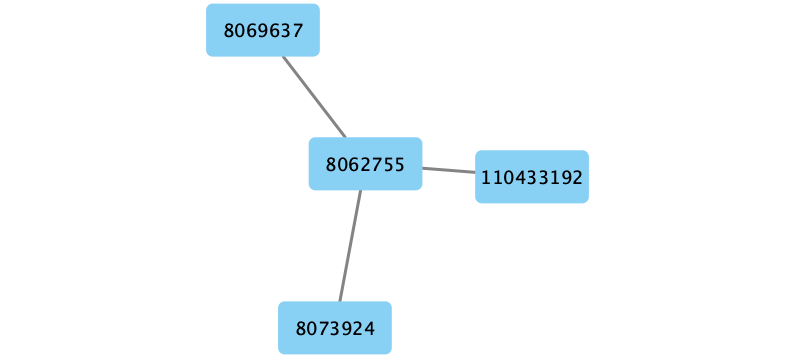

In [60]:
p4c.create_network_from_networkx(G_hit1, title="Sbi_coexpression", collection="Sbi")
p4c.notebook_export_show_image()

Applying default style...
Applying preferred layout


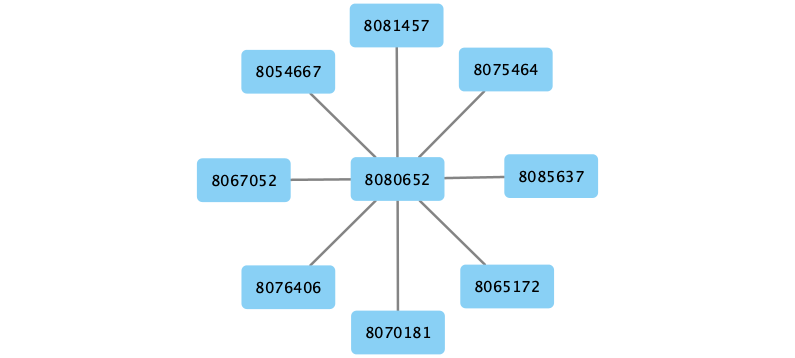

In [61]:
p4c.create_network_from_networkx(G_hit2, title="Sbi_coexpression", collection="Sbi")
p4c.notebook_export_show_image()